<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Timeseries_visualization_with_Pandas_and_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let us look at a timeseries dataset. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

* Date — The date (yyyy-mm-dd format)
* Consumption — Electricity consumption in GWh
* Wind — Wind power production in GWh
* Solar — Solar power production in GWh
* Wind+Solar — Sum of wind and solar power production in GWh

In [115]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017. To see what the data looks like, let’s use the head() and tail() methods to display the first three and last three rows.

In [116]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [117]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Next, let’s check out the data types of each column.

In [118]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

Let us convert the Date column to a timestamp

In [119]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily.Date, format='%Y-%m-%d')
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Now that the Date column is the correct data type, let’s set it as the DataFrame’s index.

In [120]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [121]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [122]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,5
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,3
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,3
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,4
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,1


Let us select data for a single day using a string such as '2017-08-10'

In [123]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

We can also select a slice of days, such as '2014-01-20':'2014-01-22'. As with regular label-based indexing with loc, the slice is inclusive of both endpoints.

In [124]:
opsd_daily.loc['2015-01-25':'2015-01-29']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2015-01-25,1290.655,111.707,11.572,123.279,2015,1,6
2015-01-26,1611.883,231.594,10.594,242.188,2015,1,0
2015-01-27,1620.565,268.631,17.574,286.205,2015,1,1
2015-01-28,1626.164,441.697,16.581,458.278,2015,1,2
2015-01-29,1620.040,401.554,27.784,429.338,2015,1,3


Now let us try to visulaize our timeseries data

In [125]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the DataFrame’s plot() method.

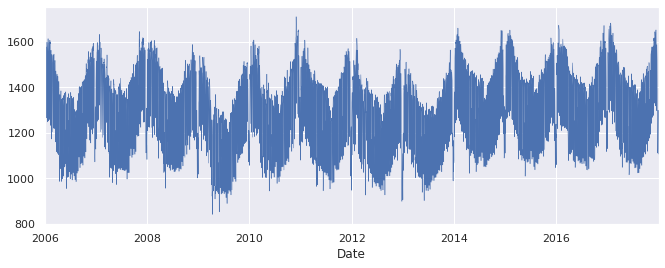

In [126]:
opsd_daily['Consumption'].plot(linewidth=0.5);

We can see that the plot() method has automatically chosen every two years as the xlabels. However, with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

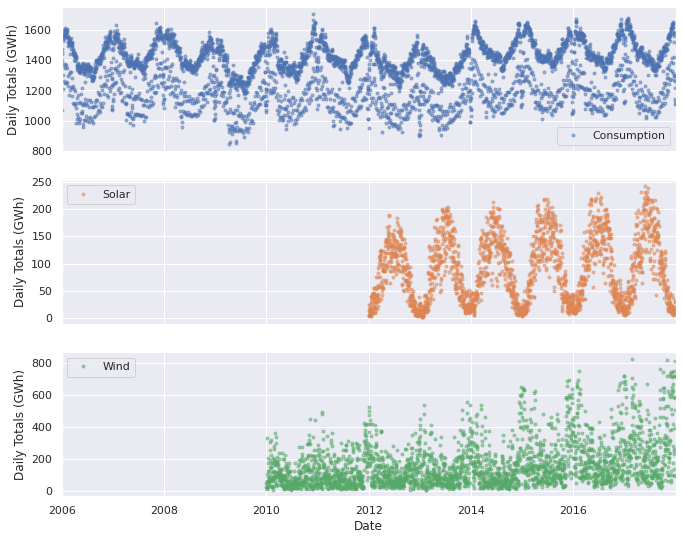

In [127]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

We can already see some interesting patterns emerge:

* Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
* Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
* Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
* Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
* There appears to be a strong increasing trend in wind power production over the years.

The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. Let’s plot the time series in a single year to investigate further

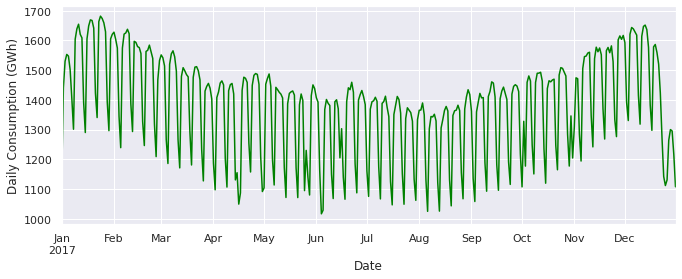

In [128]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(color = "green")
ax.set_ylabel('Daily Consumption (GWh)');

Now we can clearly see the weekly oscillations. There is a sharp drop in electricity consumption in early January and late December, during the holidays.

Let’s zoom in further and look at just January and February.

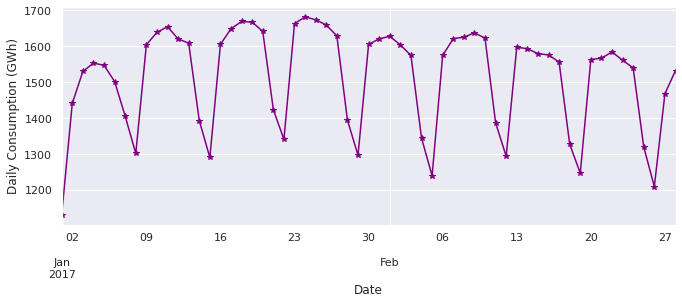

In [134]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='*', linestyle='-', color = "purple")
ax.set_ylabel('Daily Consumption (GWh)');

Let us format the dates on the x-asix to make them more readable

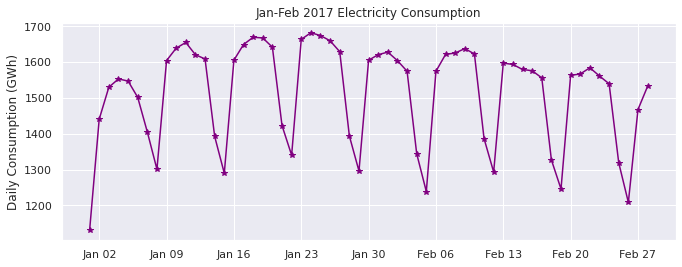

In [135]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='*', linestyle='-', color = 'purple')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.

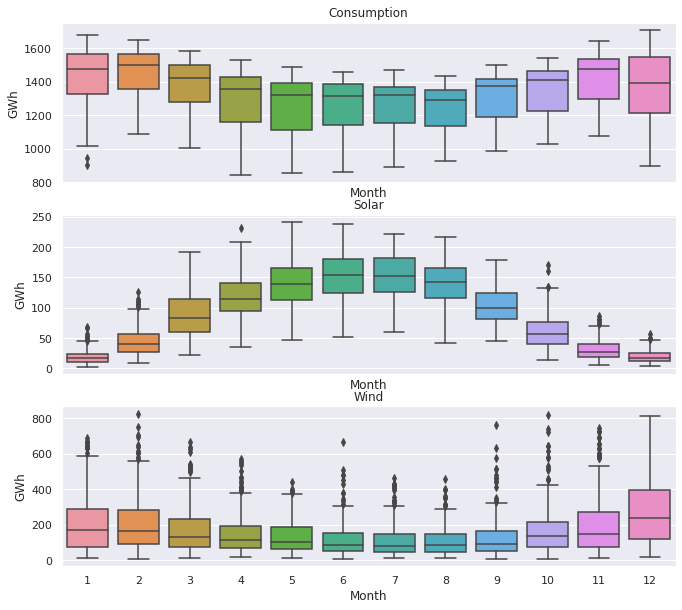

In [138]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('') 

Next, let’s group the electricity consumption time series by day of the week, to explore weekly seasonality.

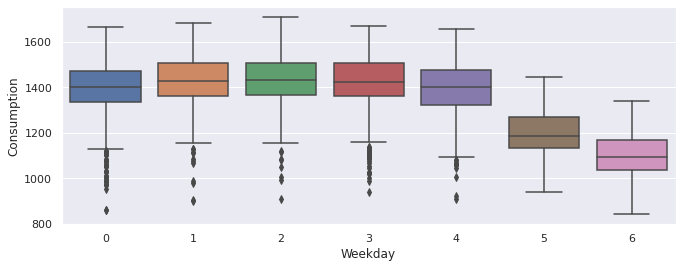

In [140]:
sns.boxplot(data=opsd_daily, x='Weekday', y='Consumption');

Resampling timeseries data: It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

We use the DataFrame’s resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.

In [141]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Since we downsampled - the weekly time series has 1/7 as many data points as the daily time series. We can confirm this by comparing the number of rows of the two DataFrames.

In [142]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


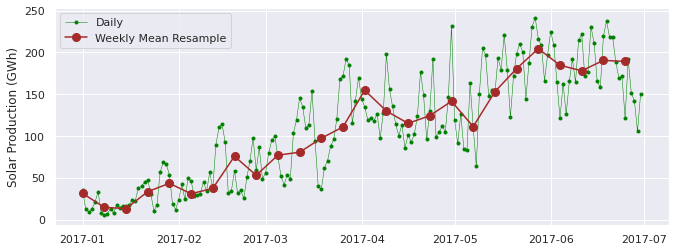

In [145]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-',color = 'green', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, color = 'brown', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. Rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.

In [146]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


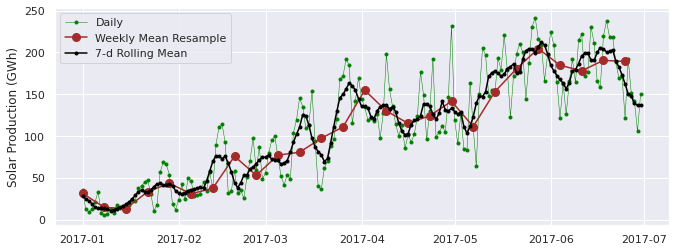

In [149]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-',color = 'green', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, color = 'brown', linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'], marker='.', linestyle='-', color = 'black', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();